<a href="https://colab.research.google.com/github/YorkJong/Colab/blob/main/ViStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualzing Stock Prices and Volume
#### References:
mplfinance:
* [如何利用 Python 金融分析可視化模組 mplfinance 繪製比特幣 K 線圖及財務指標？](https://www.grenade.tw/blog/how-to-use-the-python-financial-analysis-visualization-module-mplfinance/)
* [Python 學習筆記 : 用 mplfinance 套件繪製金融圖表 (一)](https://yhhuang1966.blogspot.com/2022/09/python-mplfinance.html)

Plotly:
* [绘制plotly金融股票图避坑指南——解决k线不连续问题](https://zhuanlan.zhihu.com/p/469985462)
* [Plotly: How to add volume to a candlestick chart](https://stackoverflow.com/questions/64689342/plotly-how-to-add-volume-to-a-candlestick-chart)
* [Plotly: How to apply different titles for each different subplots?](https://stackoverflow.com/questions/58849925/plotly-how-to-apply-different-titles-for-each-different-subplots)
* [Plotly How to move x-axis to top and y-axis to the right?](https://stackoverflow.com/questions/67590028/plotly-how-to-move-x-axis-to-top-and-y-axis-to-the-right)
* [Legends in Python](https://plotly.com/python/legend/)
* [Formatting Ticks in Python](https://plotly.com/python/tick-formatting/)

Pandas:
* [[Day09]Pandas索引的運用！](https://ithelp.ithome.com.tw/articles/10194006)

TA-Lib:
* [用 Python 快速計算 158 種技術指標！](https://medium.com/ai股仔/用-python-快速計算-158-種技術指標-26f9579b8f3a)

In [2]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [85]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2023-02-02 09:40:48--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-02 09:40:48--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-02-02 09:40:48--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [75]:
import pandas as pd
import yfinance as yf
import pandas as pd
from datetime import datetime

# Download Tesla stock data
ticker = "TSLA"
df = yf.Ticker(ticker).history(period="6mo")    # for last 6 month
#df = yf.download(ticker, start="2022-06-01")
#df = yf.download(ticker, start="2021-07-01", end="2022-01-31")
#df = yf.Ticker(ticker).history(period="max")

#print(type(df.index))
#print(df.tail())
#print(df.tail())

# Save the data to a CSV file
df.to_csv("tesla_stock.csv")

# Load the data from the file
df = pd.read_csv("tesla_stock.csv")
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.set_index('Date', inplace=True)

#df.reset_index(inplace=True)
#print(df.tail())
#df.set_index('Date')
#df.index = pd.to_datetime(df.index.values, utc=True)

#df.index = pd.to_datetime(df.index.values, format='%Y-%m-%d %H:%M:%S', utc=True)
print(type(df.index))
#df.index = df.index.strftime('%Y-%m-%d')
#df.index.values[:] = [d[:len('YYYY-mm-dd')] for d in df.index.values]
#df.set_index('Date')
#print(df.head())
#df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')
#df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M:%S')
#print(type(df.index))
#df.reset_index(inplace=True)    # index is 0..N now
#print(df.columns)
#print(df.index.size)
df.tail()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-26 05:00:00+00:00,159.970001,161.419998,154.759995,160.270004,234815100,0.0,0.0
2023-01-27 05:00:00+00:00,162.429993,180.679993,161.169998,177.899994,305632100,0.0,0.0
2023-01-30 05:00:00+00:00,178.050003,179.770004,166.500000,166.660004,230878800,0.0,0.0
2023-01-31 05:00:00+00:00,164.570007,174.300003,162.779999,173.220001,196813500,0.0,0.0
2023-02-01 05:00:00+00:00,173.889999,183.809998,169.929993,181.410004,212896600,0.0,0.0


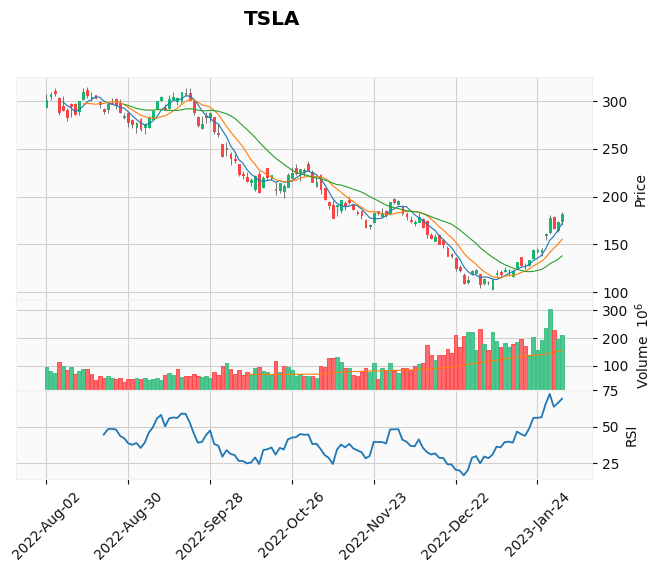

In [90]:
"""
data from yfinance
plot with mplfinance
ref. https://www.grenade.tw/blog/how-to-use-the-python-financial-analysis-visualization-module-mplfinance/
"""
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
from talib import abstract

RSI = lambda df, period: abstract.RSI(df, timeperiod=period)

# Download Tesla's stock prices
ticker = "TSLA"
df = yf.Ticker(ticker).history(period="6mo")    # for last 6 month

vma = mpf.make_addplot(df['Volume'], type='line', linestyle='', panel=1, mav=50)
rsi = mpf.make_addplot(RSI(df['Close'], 14), panel=2, ylabel='RSI')

# Plot a candlestick with 5, 10, 20 day moving averages and volume bar
mpf.plot(df, type='candle', mav=(5, 10, 20), 
         volume=True, addplot=[vma, rsi], 
         title=f"{ticker}", style='yahoo')
plt.show()


In [78]:
"""
data from yfinance
plot with plotly 
* rangebreaks for removing non-trading dates
"""
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go

# Download Tesla stock data for the past 6 months
ticker = 'TSLA'
df = yf.Ticker(ticker).history(period="6mo")

# Plot the candlestick chart
candlestick = go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='OHLC')
fig = go.Figure(data=[candlestick])

# Plot the moving average lines
for days in [5, 10, 20]:
    df['ma_{}'.format(days)] = df['Close'].rolling(window=days).mean()
    ma = go.Scatter(x=df.index, y=df['ma_{}'.format(days)], name='MA {}'.format(days))
    fig.add_trace(ma)

# Create separate y-axis for volume
volume = go.Bar(x=df.index, y=df['Volume'], name='Volume', yaxis='y2')
fig.add_trace(volume)

# Calculate volume moving average line
df['vma50'] = df['Volume'].rolling(window=50).mean()
vma50 = go.Scatter(x=df.index, y=df['vma50'], yaxis='y2', name='VMA50', line=dict(color='purple'))
fig.add_trace(vma50)

# Remove non-trading dates
df.index = df.index.strftime('%Y-%m-%d')
dt_all = pd.date_range(start=df.index.values[0], end=df.index.values[-1])
dt_all = [d.strftime("%Y-%m-%d") for d in dt_all]
trade_date = [d for d in df.index.values]
dt_breaks = list(set(dt_all) - set(trade_date))
fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])

# Update layout
fig.update_layout(
    xaxis_rangeslider_visible=False,

    title=f'{ticker}', 
    title_x=0.5, title_y=.85,
    
    yaxis=dict(title='Price (USD)', side='right', overlaying='y2'),
    yaxis2=dict(title='Volume', side='left', showgrid=False),

    legend=dict(yanchor='middle', y=0.5, xanchor="left", x=0.01)
)

# Show the figure
fig.show()

In [77]:
"""
data from yfinance
plot with plotly 
* Remove non-trading dates with addtional numbered index with ticktext
"""
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Download Tesla stock data for the past 6 months
ticker = 'TSLA'
df = yf.Ticker(ticker).history(period="6mo")
df.reset_index(inplace=True)    # index is 0..N now

# Calculate moving averages
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma10'] = df['Close'].rolling(window=10).mean()
df['ma20'] = df['Close'].rolling(window=20).mean()
df['vma50'] = df['Volume'].rolling(window=50).mean()

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, subplot_titles=(f'{ticker}', ''), 
               row_width=[0.2, 0.7])

# Plot the candlestick chart
candlestick = go.Candlestick(x=df.index, open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'], name='OHLC')
fig.add_trace(candlestick)

# Add moving averages to the figure
fig.add_trace(go.Scatter(x=df.index, y=df['ma5'], name='MA5', line=dict(color='purple', width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df['ma10'], name='MA10', line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df['ma20'], name='MA20', line=dict(color='green', width=2)))

# Create separate y-axis for volume
volume = go.Bar(x=df.index, y=df['Volume'], name='Volume', marker_color='orange') 
fig.add_trace(volume, row=2, col=1)
vma50 = go.Scatter(x=df.index, y=df['vma50'], name='VMA50', line=dict(color='purple', width=2))
fig.add_trace(vma50, row=2, col=1)

# Update layout
fig.update_layout(
    # Do not show the rangeslider plot 
    xaxis_rangeslider_visible=False,

    # Formatting ticks of xaxis
    xaxis2=dict(
        tickmode='array',
        tickvals=df.index.values[:df.index.size:20],
        ticktext=[d.strftime("%Y-%m-%d") for d in df['Date']][:df.index.size:20]
    ),

    # Show y-axes titles on right side
    yaxis=dict(side='right', title='Price (USD)'),  
    yaxis2=dict(side='right', title='Volume'),

    # Modify position of legend
    legend=dict(yanchor='middle', y=0.5, xanchor="left", x=0.01)
)

# Show the figure
fig.show()
